In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
who_list = pd.read_csv('http://apps.who.int/gho/athena/data/GHO/WHOSIS_000001,WHOSIS_000015?filter=COUNTRY:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX&profile=verbose&format=csv')
# save a local copy of the data set for our Flask prototype later on
who_list.to_csv('WHOSIS_000001,WHOSIS_000015.csv')
        
# Keep only useful features fix case display of country text
who_list = who_list[['GHO (DISPLAY)', 'YEAR (CODE)' , 'COUNTRY (DISPLAY)', 'SEX (DISPLAY)', 'Numeric']]
who_list['COUNTRY (DISPLAY)'] = [ctry.title() for ctry in who_list['COUNTRY (DISPLAY)'].values]
# print a few rows
who_list[who_list['COUNTRY (DISPLAY)']=='India'].head(10)

,GHO (DISPLAY),YEAR (CODE),COUNTRY (DISPLAY),SEX (DISPLAY),Numeric
2210,Life expectancy at birth (years),2002,India,Male,62.70160
2211,Life expectancy at birth (years),2003,India,Male,63.08193
2212,Life expectancy at birth (years),2004,India,Male,63.41594
2213,Life expectancy at birth (years),2005,India,Male,63.87052
2214,Life expectancy at birth (years),2006,India,Male,64.28259
2215,Life expectancy at birth (years),2001,India,Female,63.44758
2216,Life expectancy at birth (years),2002,India,Female,63.86421
2217,Life expectancy at birth (years),2003,India,Female,64.25252
2218,Life expectancy at birth (years),2004,India,Female,64.63663
2219,Life expectancy at birth (years),2000,India,Both sexes,62.48507


In [9]:
country = 'India'
sex = 'Female'
sub_set = who_list[who_list['COUNTRY (DISPLAY)'].str.startswith(country, na=False)]

sub_set = sub_set.sort_values('YEAR (CODE)', ascending=False)
sub_set_birth = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at birth (years)'] 
sub_set_60 = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at age 60 (years)'] 
print('sub_set_birth:')
print(sub_set_birth.head(5))
print('sub_set_60:')
print(sub_set_60.head(5))

sub_set_birth:
                          GHO (DISPLAY)  YEAR (CODE) COUNTRY (DISPLAY)  \
2223   Life expectancy at birth (years)         2016             India   
3031   Life expectancy at birth (years)         2016             India   
3036   Life expectancy at birth (years)         2016             India   
11626  Life expectancy at birth (years)         2015             India   
11622  Life expectancy at birth (years)         2015             India   

      SEX (DISPLAY)   Numeric  
2223     Both sexes  68.82572  
3031           Male  67.43705  
3036         Female  70.33931  
11626    Both sexes  68.49070  
11622        Female  69.96235  
sub_set_60:
                           GHO (DISPLAY)  YEAR (CODE) COUNTRY (DISPLAY)  \
17403  Life expectancy at age 60 (years)         2016             India   
9457   Life expectancy at age 60 (years)         2016             India   
9453   Life expectancy at age 60 (years)         2016             India   
9461   Life expectancy at age 60 (ye

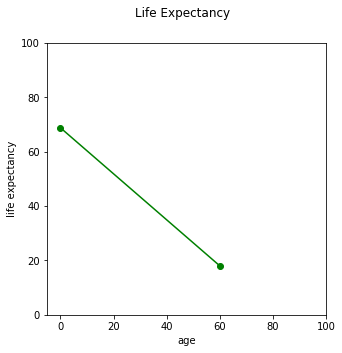

In [23]:
at_birth = sub_set_birth['Numeric'].values[0]
at_60 = sub_set_60['Numeric'].values[0]
age = [0,60]
life_expectancy = [at_birth,at_60]
fig, axes = plt.subplots(figsize=(5,5))
x = age
y = life_expectancy
axes.plot(x,y,color ='green', marker ='o')
fig.suptitle('Life Expectancy')
axes.set_xlabel('age')
axes.set_xlim([-5,100])
axes.set_ylabel('life expectancy')
axes.set_ylim([0,100])
plt.show()

In [25]:
from scipy import stats
# model 
slope, intercept, r_value, p_value, std_err = stats.linregress(age, life_expectancy)
print('intercept: ', intercept)
print('slope: ', slope)


intercept:  68.82571999999999
slope:  -0.8468433333333332


27.0

In [29]:
#function to calculate life expectancy
def life_expectancy(age):
   return np.ceil(slope * age + intercept)

In [30]:
print(life_expectancy(50))

27.0


In [33]:
def get_life_expectancy(age, country,sex):
    sub_set = who_list[who_list['COUNTRY (DISPLAY)'].str.startswith(country, na=False)]
    sub_set = sub_set[sub_set['SEX (DISPLAY)'] == sex]
    sub_set = sub_set.sort_values('YEAR (CODE)', ascending=False)
    sub_set_birth = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at birth (years)'] 
    sub_set_60 = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at age 60 (years)'] 
    if len(sub_set_birth['Numeric']) > 0 and len(sub_set_60['Numeric']) > 0:
        at_birth = sub_set_birth['Numeric'].values[0]
        at_60 = sub_set_60['Numeric'].values[0]
    
        #model
        slope, intercept, r_value, p_value, std_err = stats.linregress([0,60],[at_birth,at_60])
        return (np.ceil(slope* age + intercept))
    else:
        return None
